# Project: Train a Quadcopter How to Fly
#### Udacity Deep Learning Nan

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

## Project Structure

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  

For this project, we will define our own task in `task.py`. 

We will also design a reinforcement learning agent in `agent.py` to complete our chosen task.  


## Controlling the Quadcopter

A sample agent has been provided in the code cell below to show how to use the sim to control the quadcopter. This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that we will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [34]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [35]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

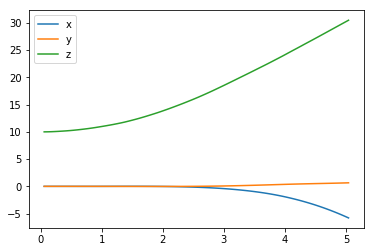

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

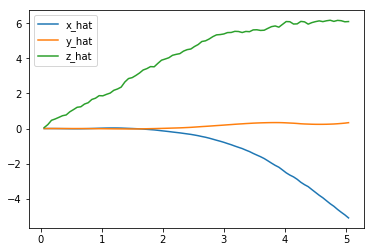

In [37]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

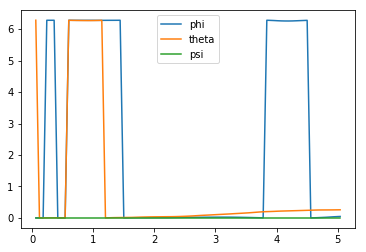

In [38]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

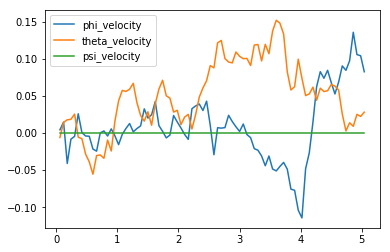

In [39]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

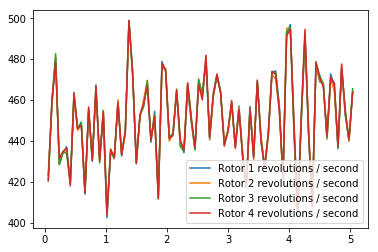

In [40]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [41]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-5.79212327  0.64949173 30.48495034  0.04624862  0.25794671  0.        ]
[-5.09722123  0.33438664  6.1015769 ]
[0.08256538 0.02815267 0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [31]:
import sys
import pandas as pd

In [42]:
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 500
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =  500, score =   0.349 (best =   0.751), noise_scale = 3.2

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [43]:
%autoreload 2

import sys
import csv
import numpy as np
from agents.agent import DDPG
from task import Task

num_episodes = 500
target_pos = np.array([0., 0., 20.])
task = Task(target_pos=target_pos)
agent = DDPG(task) 

rewards_history = "rewards.txt"
rewards_labels = ['episode', 'reward']
rewards_results = {x: [] for x in rewards_labels}

avg_scores = []
for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    score = 0
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        score += reward
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
                 i_episode, agent.score, agent.best_score), end="")  # [debug]
            break    
    rewards_results['episode'].append(i_episode)
    rewards_results['reward'].append(score)
sys.stdout.flush()

Episode =  500, score =   3.000 (best =   3.000)

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

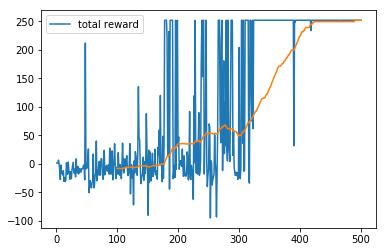

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(rewards_results['episode'], rewards_results['reward'], label='total reward')

N = 100
cumsum, moving_averages = [0], []

for i, x in enumerate(rewards_results['reward'], 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_average = (cumsum[i] - cumsum[i-N])/N
        moving_averages.append(moving_average)
        
plt.plot(rewards_results['episode'][99:], moving_averages)
plt.legend()
_ = plt.ylim()

## Run a simulation and plot the flight trajectory

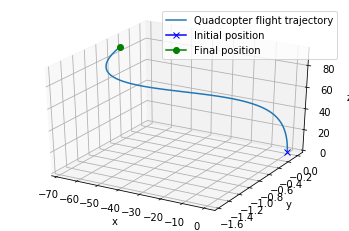

In [45]:
file_output = 'ddpg_agent_takeoff_sim.txt'                         

# Setup
runtime = 5.  
init_pose = np.array([0., 0., 0., 0., 0., 0.])   # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities

target_pos = np.array([0., 0., 100.])
task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x: [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        state = agent.reset_episode()
        rotor_speeds = agent.act(state)
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
    
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d', xlabel='x', ylabel='y', zlabel='z')
x = np.append(init_pose[0], results['x'])
y = np.append(init_pose[1], results['y'])
z = np.append(init_pose[2], results['z'])
final_idx = len(x)-1
ax.plot(x, y, z, label='Quadcopter flight trajectory')
ax.plot([init_pose[0]], [init_pose[1]], [init_pose[2]], label='Initial position', color='blue', marker='x')
ax.plot([x[final_idx]], [y[final_idx]], [z[final_idx]], label='Final position', color='green', marker='o')
ax.legend()
plt.show()

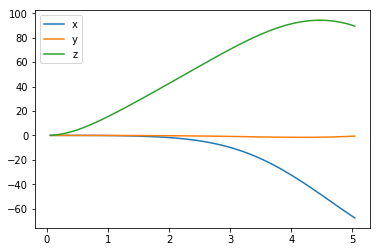

In [46]:
plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

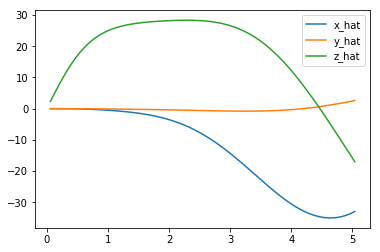

In [47]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

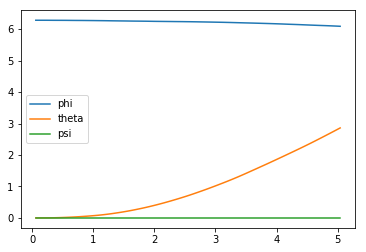

In [48]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

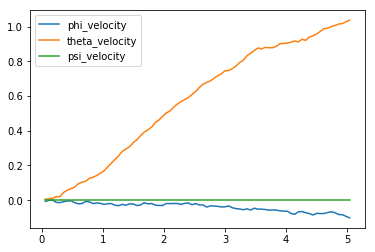

In [49]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: The task I've specified is takeoff. As I was designing the reward function, I've tried to reward the agent for moving upwards, with the use of its Z-coordinate and the upward velocity, and penalize the agent for any sideways movement (X and Y position and velocity). I've used `np.tanh` function to limit the reward between -1 and 1, and I've added a huge additional reward for reaching the target altitude:

#### The final reward function

```python
def get_reward(self):
    """Uses current pose and velocity of sim to return reward."""
    dist_reward = 5*self.sim.pose[2] - 2*np.abs(self.sim.pose[0] + self.sim.pose[1])
    vel_reward = 5*self.sim.v[2] - 2*np.abs(self.sim.v[0] + self.sim.v[1])
    reward = dist_reward + vel_reward
    if self.sim.pose[2] >= self.target_pos[2]:
        reward += 100    
    return np.tanh(reward)
```

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: The algorithm I've used for this project is Deep Deterministic Policy Gradients (DDPG) (https://arxiv.org/abs/1509.02971). This seemed a reasonable choice for a problem in a continuous action space. Although I've tried quite a few different combinations of hyperparameters, I've pretty much ended up using the same hyperparameters as those specified in the paper. 

**Hyperparameters**:

- Discount factor $\gamma$ = 0.99
- Ornstein-Uhlenbeck process parameters :
    - $\mu$ = 0.0
    - $\theta$ = 0.15
    - $\sigma$ = 0.2
- Soft update $\tau$ = 0.001
- Replay memory:
    - buffer_size = 100000
    - batch_size = 64

**Neural Network Architecture**:

- **The Actor Network** : 
    - Dense(400) $\rightarrow$ BatchNormalization $\rightarrow$ ReLU $\rightarrow$ Dense(300) $\rightarrow$ BatchNormalization $\rightarrow$ ReLU $\rightarrow$ Dense(action_size) $\rightarrow$ Tanh $\rightarrow$ Scale to action_range
    - Initializers: LeCun uniform initializer for weights and biases in hidden layers, random uniform between [-0.003, 0.003] for both weights and biases in the output layer
    - Regularizers: L2 regularization (0.000001) for weights, L1 regularization for biases in hidden layers, no regularization in output layer
    - Optimizer: Adam(lr=0.0001)

- **The Critic Network** : 
    - Input 1 (State pathway):
        - Dense(400) $\rightarrow$ BatchNormalization $\rightarrow$ ReLU $\rightarrow$ Dense(300) $\rightarrow$ BatchNormalization $\rightarrow$ ReLU $\rightarrow$ Dense(action_size) $\rightarrow$ Tanh
    - Input 2 (Action pathway):
        - Dense(400) $\rightarrow$ BatchNormalization $\rightarrow$ ReLU $\rightarrow$ Dense(300) $\rightarrow$ BatchNormalization $\rightarrow$ ReLU $\rightarrow$ Dense(action_size) $\rightarrow$ Tanh
    - The final network:
        - Add(Input1, Input2) $\rightarrow$ Dense(200) $\rightarrow$ BatchNormalization $\rightarrow$ ReLU $\rightarrow$ Dense(1)
    - Initializers: LeCun uniform initializer for weights and biases in hidden layers, random uniform between [-0.003, 0.003] for weights and biases in the output layer
    - Regularizers: L2 regularization (0.000001) for weights, L1 regularization for biases in all hidden layers, no regularization in output layer
    - Optimizer: Adam(lr=0.001)

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: It doesn't seem to have been a very easy task to learn for this agent, given the fact that it took him more than 400 episodes to start visibly improving. After that point however, which could be considered a sort of "aha moment", the average performance of the agent starts improving dramatically, plateauing around ~250. The mean rewards over the last 10 episodes was 252.0.

#### Episode rewards plot

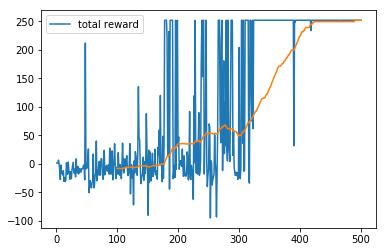

In [50]:
plt.plot(rewards_results['episode'], rewards_results['reward'], label='total reward')        
plt.plot(rewards_results['episode'][99:], moving_averages)
plt.legend()
_ = plt.ylim()

#### Mean rewards over the last 10 episodes

In [51]:
np.mean(rewards_results['reward'][-10:])

252.0

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: The hardest part of the project was waiting for the agents to train, because it took quite a while on different PC's and at first I didn't have the patience to wait for more than 300 episodes, but then I realized that it might take the agent much longer to actually learn something, or maybe I gave up on trying to achieve acceptable performance in such short time, and I've started training the agents for longer periods of time.
    
At first I thought that takeoff was a somewhat obvious task for a quadcopter to learn, but it actually turned out not so easy after all, and the agent would often not be able to rise very high and just fell down after a couple moves, or sometimes it would do a little loop, rise and go back down, and then rise even higher. I would never think the reward function I tried to specify in the way that seemed most intuitive for myself would lead the agent to behave in such a way.   